In [55]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy.stats as sps
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
sns.set_style("darkgrid")

In [56]:
def split3(l):
    l1, l2 = train_test_split(l, test_size=0.66, random_state=42)
    l2, l3 = train_test_split(l2, test_size=0.5, random_state=42)
    return [l1, l2, l3]

In [57]:
file = pd.read_csv("data.csv")
columns = file.columns[8:15]
time_labels = [int(i.split("_")[1]) for i in columns]
bottom_limit = .665
top_limit = .71
train, test = train_test_split(file, test_size=0.2, random_state=42)
train_split3 = split3(train)

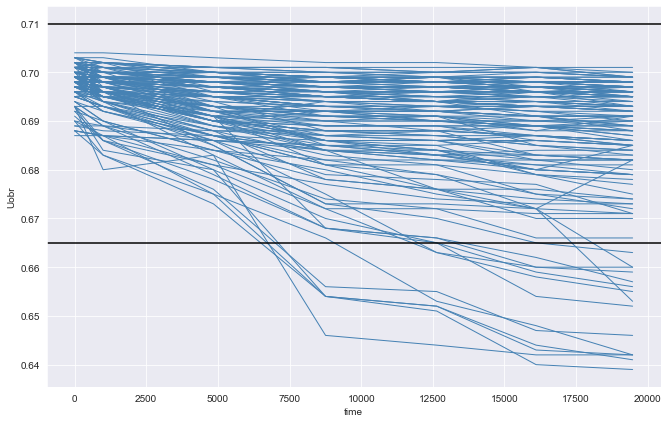

In [58]:
plt.figure(figsize=(11, 7))
for i in file[columns].iloc:
    data = np.array(i)
    plt.xlabel('time')
    plt.ylabel('Uobr')
    plt.plot(time_labels, data, color='steelblue', linewidth=1)
plt.axhline(y=bottom_limit, xmin=0, xmax=1, color='k', linewidth=1.5)
plt.axhline(y=top_limit, xmin=0, xmax=1, color='k', linewidth=1.5)

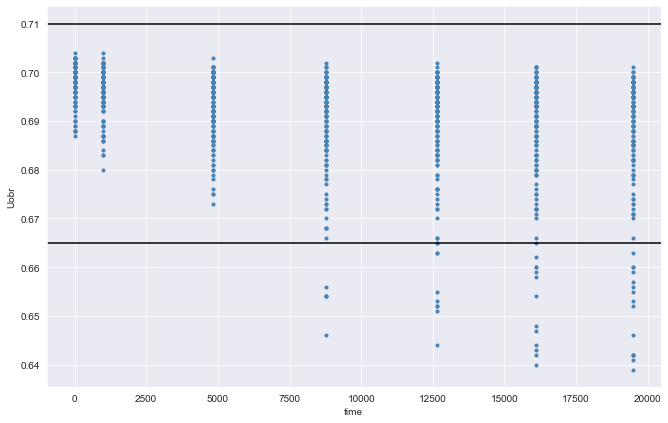

In [59]:
plt.figure(figsize=(11, 7))
for i in file[columns].iloc:
    data = np.array(i)
    plt.xlabel('time')
    plt.ylabel('Uobr')
    plt.scatter(time_labels, data, color='steelblue', marker=".")
plt.axhline(y=bottom_limit, xmin=0, xmax=1, color='k', linewidth=1.5)
plt.axhline(y=top_limit, xmin=0, xmax=1, color='k', linewidth=1.5)

In [60]:
linear_regression_x = []
mean = []
std = []
for i in train_split3:
    train_mean0 = np.array(i[columns[0]]).mean()
    train_std0 = np.array(i[columns[0]]).std()
    for t, c in zip(time_labels, columns):
        linear_regression_x.append([t, train_mean0, train_std0])
        mean.append(np.array(i[c]).mean())
        std.append(np.array(i[c]).std())
linear_regression_x = np.array(linear_regression_x)

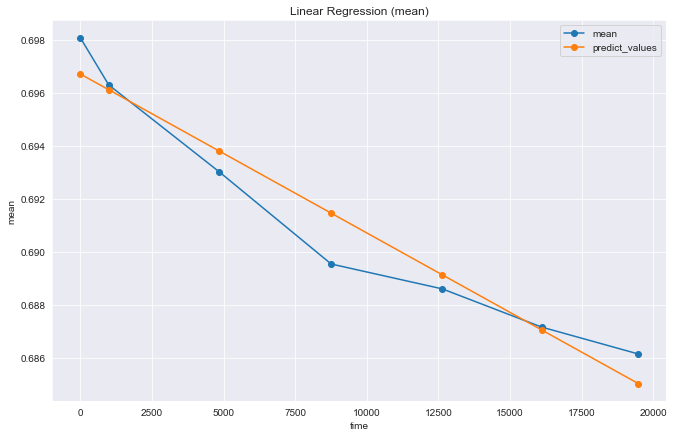

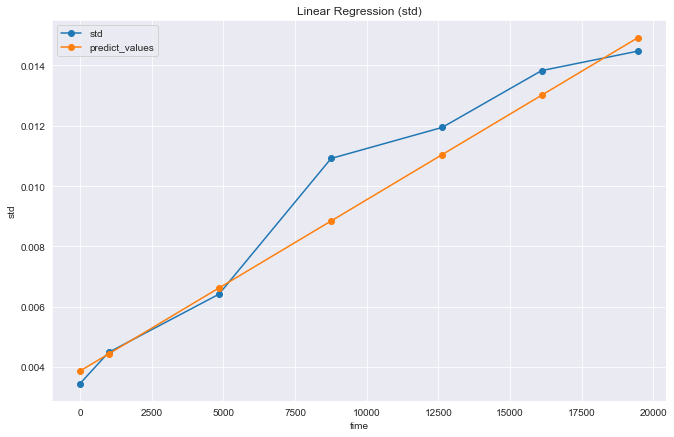

In [61]:
model_mean = LinearRegression()
model_mean.fit(linear_regression_x, mean)

model_std = LinearRegression()
model_std.fit(linear_regression_x, std)

train_mean0 = np.array(train[columns[0]]).mean()
train_std0 = np.array(train[columns[0]]).std()
linear_regression_x_train = np.array([[i, train_mean0, train_std0] for i in time_labels])

plt.figure(figsize=(11, 7))
plt.title('Linear Regression (mean)')
plt.xlabel('time')
plt.ylabel('mean')
plt.plot(time_labels, [np.array(train[i]).mean() for i in columns], label="mean", marker="o")
plt.plot(time_labels, model_mean.predict(linear_regression_x_train), label="predict_values", marker="o")
plt.legend()

plt.figure(figsize=(11, 7))
plt.title('Linear Regression (std)')
plt.xlabel('time')
plt.ylabel('std')
plt.plot(time_labels, [np.array(train[i]).std() for i in columns], label="std", marker="o")
plt.plot(time_labels, model_std.predict(linear_regression_x_train), label="predict_values", marker="o")
plt.legend()

In [62]:
test_mean0 = np.array(test[columns[0]]).mean()
test_std0 = np.array(test[columns[0]]).std()
linear_regression_x_test = np.array([[i, test_mean0, test_std0] for i in time_labels])
mean_test = model_mean.predict(linear_regression_x_test)
std_test = model_std.predict(linear_regression_x_test)

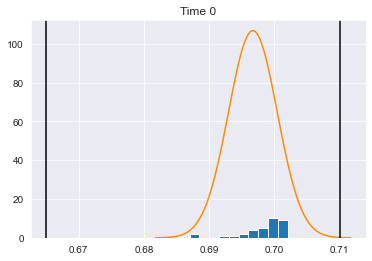

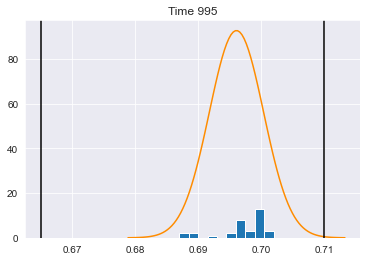

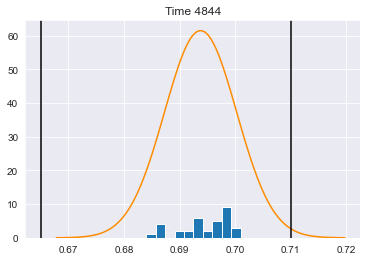

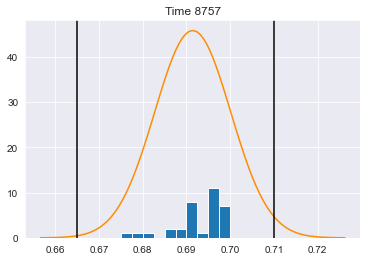

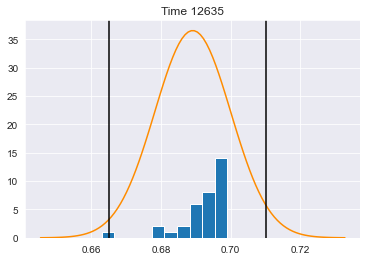

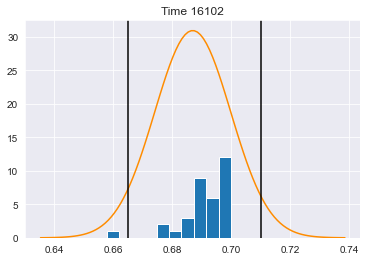

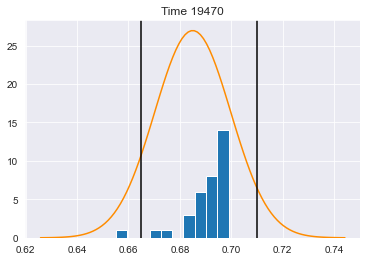

In [63]:
for i, j, k, l in zip(time_labels, columns, mean_test, std_test):
    x = np.linspace(k - 4 * l, k + 4 * l, 100)
    plt.title(f'Time {i}')
    plt.hist(test[j])
    plt.plot(x, sps.norm(loc=k, scale=l).pdf(x), color='darkorange')
    plt.axvline(bottom_limit, 0, 1, color='k')
    plt.axvline(top_limit, 0, 1, color='k')
    plt.show()

In [64]:
test_working_predict = []
for i, j in zip(mean_test, std_test):
    test_working_predict.append(sps.norm(loc=i, scale=j).cdf(top_limit) - sps.norm(loc=i, scale=j).cdf(bottom_limit))

In [65]:
test_working_experiment = []
for i in columns:
    working = 0
    for j in test[i]:
        if j > bottom_limit and j < top_limit:
            working += 1
    test_working_experiment.append(working / test.shape[0])

In [66]:
test_error = 0
for p, e in zip(test_working_predict, test_working_experiment):
    test_error += pow((p - e) / e, 2)
test_error = np.sqrt(test_error / len(test_working_predict))

In [67]:
print(f"Процент рабочих устройств:\n{'Время'.ljust(8)}{'Прогноз'.ljust(21)}Реальное значение")
for t, p, e in zip(time_labels, test_working_predict, test_working_experiment):
    print(f"{str(t).ljust(8)}{str(p).ljust(21)}{e}")
print(f"Ошибка: {test_error}")


Процент рабочих устройств:
Время   Прогноз              Реальное значение
0       0.9998161474272355   1.0
995     0.9993877328257122   1.0
4844    0.9937840096474327   1.0
8757    0.9822807839041702   1.0
12635   0.9586205726293527   0.9705882352941176
16102   0.9190137573408809   0.9705882352941176
19470   0.866119261078397    0.9705882352941176
Ошибка: 0.04615789731814429
